## Escuela de Ingeniería en Computación, ITCR 

## Aprendizaje automático

 
### Quiz 03


Profesora: María Auxiliadora Mora

Estudiante: Marco Ferraro Rodríguez

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual

---

Resumen: En el presente trabajo se realizarán ejercicios para repasar algunos conceptos sobre proyectos de clasificación utilizando Python y PyTorch.

---



### 1. Problema

El objetivo de este trabajo tiene como objetivo aplicar conceptos de aprendizaje automático; especificamente realizar un modelo de Red Recurrente para genara un análisis y un flujo de trabajo del contexto de Procesamiento de Lenguaje Natural.

#### 1.1 Selección de conjunto de datos

Para el conjunto de datos vamos a utilizar una dataset de reseñas de comidas en Amazon. Un dato importante es que se tiene una columna **Score**. Representa un valor númerico, de 1 a 5. Los valores mayores tienen una connotación positiva. 

https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [1]:
import pandas as pd

df = pd.read_csv('./data/Reviews.csv')

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### 1.2 Datos Faltantes

En esta sección vamos a eliminar todas las filas que tengan datos faltantes.

In [2]:
missing_values = df.isnull().sum()


print(missing_values)

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [3]:
df = df.dropna()
missing_values = df.isnull().sum()

print(missing_values)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [4]:
y = df['Score']
X = df[['Text']]

X.shape

(568401, 1)

### 1.3 Preparación de texto

En esta sección eliminaremos caracteres especiales y stop words. Adicionalmente haremos que todos los caracteres esten en minusculas.

In [5]:
regular_expresion = r'[^A-Za-z0-9\s]'


X['Text'] = X['Text'].str.replace(r'[^A-Za-z0-9\s]', '')

X.head()

C:\Users\Marco\AppData\Local\Temp\ipykernel_3288\3676562090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Text'] = X['Text'].str.replace(r'[^A-Za-z0-9\s]', '')


,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [6]:
X['Text'] = X['Text'].str.lower()

X.head()

C:\Users\Marco\AppData\Local\Temp\ipykernel_3288\733488383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Text'] = X['Text'].str.lower()


,Text
0,i have bought several of the vitality canned d...
1,product arrived labeled as jumbo salted peanut...
2,this is a confection that has been around a fe...
3,if you are looking for the secret ingredient i...
4,great taffy at a great price. there was a wid...


In [7]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

X['Text'] = X['Text'].apply(remove_stop_words)

X.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Marco\AppData\Local\Temp\ipykernel_3288\4312981.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Text'] = X['Text'].apply(remove_stop_words)


,Text
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanuts.....
2,"confection around centuries. light, pillowy ci..."
3,looking secret ingredient robitussin believe f...
4,great taffy great price. wide assortment yummy...


In [8]:
X = X['Text']

X.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object

In [9]:
y.shape

(568401,)

Otro aspecto importante, es que el dataset es muy grande. Por motivos de tiempo de procesamiento y evitar overfitting vamos a reducir el tamaño a 5 mil filas. Estos indices serán elegidos de forma aleatoria.

In [10]:
import random
sample_size = 5000

X = pd.DataFrame({'X': X})
y = pd.DataFrame({'y': y})

if len(X) > sample_size:
    random_indices = random.sample(X.index.tolist(), sample_size)
    X_sampled_df = X.loc[random_indices]
    y_sampled_df = y.loc[random_indices]
else:
    X_sampled_df = X
    y_sampled_df = y

X = X_sampled_df['X']
y = y_sampled_df['y']

X.shape

(5000,)

### 2 Exploración y Visualización

Hay que realizar exploración de datos para entender la naturaleza de estos mismos.

#### 2.1 Histogramas y Pie Chart

Los histogramas nos ayudan a entender la frecuencia de los variables categoricas. Asimismo el pie chart nos demuestra una distribución de target values.

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def plot_histogram(y):
    class_counts = y.value_counts(normalize=True) * 100
    plt.bar(class_counts.index, class_counts.values, align='center', alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Class')
    plt.ylabel('Percentage')
    plt.title('Class Distribution')

    for i, v in enumerate(class_counts.values):
        plt.text(class_counts.index[i], v + 1, f'{v:.1f}%', ha='center')

    plt.ylim(0, 100)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

    plt.show()

In [12]:
def plot_pie_chart(y):
    class_counts = y.value_counts(normalize=True) * 100
    class_labels = class_counts.index.tolist()
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'pink']
    plt.pie(class_counts, labels=class_labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Class Distribution')
    plt.axis('equal')

    plt.show()

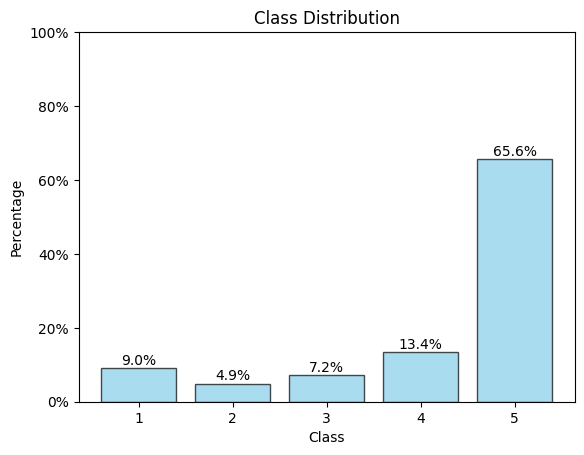

In [13]:
plot_histogram(y)

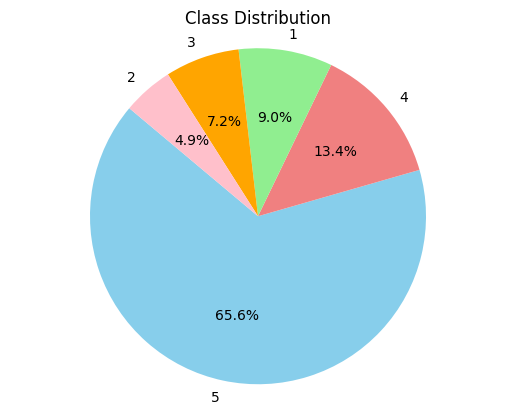

In [14]:
plot_pie_chart(y)

Como se puede ver, los datos no estan balanceados y el valor 5 está sobrepoblado.

### 3 Definicion de Modelo

En esta sección definiremos el modelo y realizamos el entrenamiento

In [15]:
X

145221    so, like things sweet. especially coffee main ...
101407    children love beans mild-no spices. spices use...
177091    first thing stands "cookies" packed fruit. can...
182897    come listed $88.40?<br />how come small?<br />...
546145    chance introduction savini tartufi white truff...
                                ...                        
558927    2 lb. bag 4-5 flavors. buy multiple bags mix t...
59904     product seems replaced similar previous produc...
70189     word: yummy. blend flavors quite unique refres...
306256    surprised, yes - really pack 4 bags low price....
275999    vigo knows combine flavors. living south, occa...
Name: X, Length: 5000, dtype: object

In [16]:
y

145221    4
101407    5
177091    5
182897    1
546145    5
         ..
558927    5
59904     3
70189     5
306256    5
275999    5
Name: y, Length: 5000, dtype: int64

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.nn.utils.rnn import pad_sequence

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [18]:
tokenizer = get_tokenizer('basic_english')

def build_vocab_from_list(X):
    tokens = tokenizer('\n'.join(X))
    vocab = build_vocab_from_iterator([tokens], specials=["<unk>", "<pad>"], special_first=True)
    return vocab

def text_pipeline(text, vocab):
    tokens = tokenizer(text)
    numericalized = [vocab[token] for token in tokens]
    return torch.tensor(numericalized)

def collate_batch(batch):
    texts, labels = zip(*batch)
    texts = pad_sequence(texts, batch_first=True, padding_value=0)
    labels = torch.tensor(labels)
    return texts, labels



In [19]:

class TextClassificationDataset(Dataset):
    def __init__(self, X, y, vocab):
        self.X = X
        self.y = y
        self.vocab = vocab

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        text = self.X.iloc[idx]
        label = self.y.iloc[idx]
        return text_pipeline(text, self.vocab), label



In [20]:
from torch.utils.data import DataLoader, random_split


class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, _ = self.lstm(embedded)
        return self.fc(output[:, -1, :])

embedding_dim = 100
hidden_dim = 256
output_dim = 5  # Assuming there are 5 classes (1, 2, 3, 4, 5)


vocab = build_vocab_from_list(X)
dataset = TextClassificationDataset(X, y, vocab)
batch_size = 32  

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
val_data_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)



In [21]:
NUM_EPOCHS = 300

model = LSTMClassifier(len(vocab), embedding_dim, hidden_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)


print_epochs = [1, 10, 15, 30, 50, 75, 100, 150, 200, 250, 300]
loss_values = []

for epoch in range(NUM_EPOCHS):
    model.train()
    train_loss = 0.0

    for batch_X, batch_y in train_data_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        output = model(batch_X)
        
        batch_y = batch_y - 1
        
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_data_loader.dataset)
    loss_values.append(train_loss)

    if (epoch + 1) in print_epochs:
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {train_loss:.4f}')

Epoch [1/300], Loss: 0.0353
Epoch [10/300], Loss: 0.0333
Epoch [15/300], Loss: 0.0330
Epoch [30/300], Loss: 0.0325
Epoch [50/300], Loss: 0.0268
Epoch [75/300], Loss: 0.0011
Epoch [100/300], Loss: 0.0004
Epoch [150/300], Loss: 0.0001
Epoch [200/300], Loss: 0.0000
Epoch [250/300], Loss: 0.0000
Epoch [300/300], Loss: 0.0000


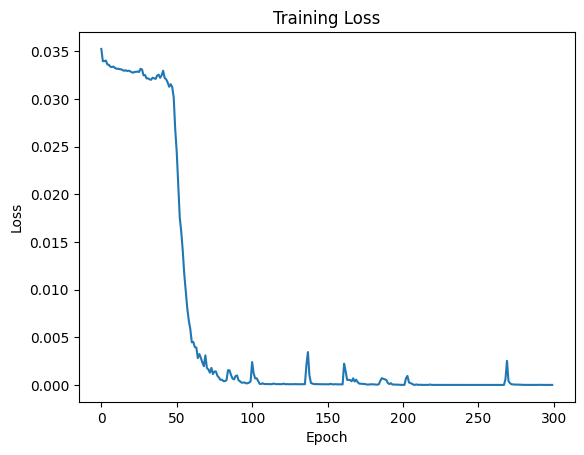

In [22]:
plt.plot(range(NUM_EPOCHS), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### 4. Evaluacion de Modelo

En esta seccion se realizara la validacion del modelo

In [23]:
val_predictions = []
val_targets = []

with torch.no_grad():
    for batch_X, batch_y in val_data_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                
        output = model(batch_X)
        _, predicted = torch.max(output, 1)
                
        val_predictions.extend(predicted.cpu().tolist())
        val_targets.extend(batch_y.cpu().tolist())

Ajuste para la la matriz de confusión

In [24]:
class_names = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]

val_predictions = [pred + 1 for pred in val_predictions]

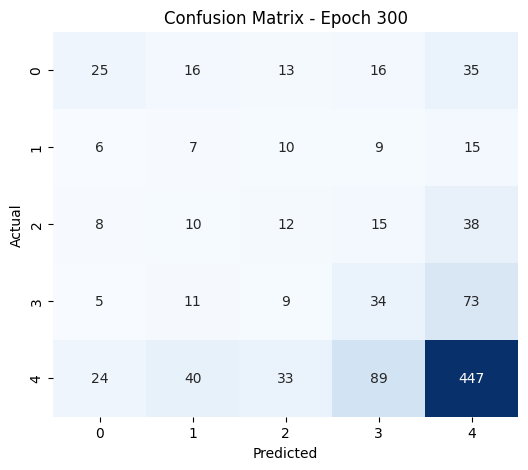

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(val_targets, val_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f'Confusion Matrix - Epoch {epoch+1}')
plt.show()

In [26]:


report = classification_report(val_targets, val_predictions)
print(f'Classification Report - Epoch {epoch+1}:\n{report}')

Classification Report - Epoch 300:
              precision    recall  f1-score   support

           1       0.37      0.24      0.29       105
           2       0.08      0.15      0.11        47
           3       0.16      0.14      0.15        83
           4       0.21      0.26      0.23       132
           5       0.74      0.71      0.72       633

    accuracy                           0.53      1000
   macro avg       0.31      0.30      0.30      1000
weighted avg       0.55      0.53      0.53      1000



### 5. Análisis de resultado

Vemos que el desempeño del modelo es relativamente pobre, manejando un accuracy del 57%. Adicionalmente la única clase por la cual tiene un buen rendimiento es los de connotación 5.

### 6. Conclusiones

Es posible inferir varias areas de mejora: 

* Desbalanceo de datos: El hecho de que el 60% de los datos tengan un valor objetivo (target) de 5 indica un desbalance significativo en las clases. Esto puede conducir a un sesgo hacia la clase mayoritaria durante el entrenamiento del modelo, lo que explica el sobreajuste (overfitting). Para mejorar el rendimiento del modelo, se debe abordar el desbalanceo de los datos. Se pueden emplear técnicas como sobremuestreo, submuestreo, o utilizar algoritmos de aprendizaje que manejen automáticamente el desbalanceo.
* Regularización: Dado que el modelo está presentando sobreajuste, se puede considerar el uso de técnicas de regularización, como Dropout o L2 regularization, para reducir la complejidad del modelo y evitar el overfitting. La adición de términos de penalización o la aleatorización de unidades durante el entrenamiento pueden ayudar a mejorar la generalización del modelo.
* Hiperparámetros: Es importante revisar los hiperparámetros del modelo, como la tasa de aprendizaje, el tamaño del batch, el número de capas y la dimensión oculta de la red LSTM. Ajustar adecuadamente estos hiperparámetros puede ayudar a encontrar un equilibrio entre el ajuste y la generalización del modelo.
* Validación cruzada: Se recomienda utilizar técnicas de validación cruzada, como la validación cruzada estratificada o K-fold, para evaluar el rendimiento del modelo de manera más robusta y reducir el impacto del desbalanceo de los datos. La validación cruzada ayuda a tener una mejor estimación del rendimiento general del modelo en diferentes conjuntos de datos.

### 7. Referencias

Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural computation, 9(8), 1735-1780.


Van Houdt, G., Mosquera, C., & Nápoles, G. (2020). A review on the long short-term memory model. Artificial Intelligence Review, 53, 5929-5955.

Zhu, X., Sobihani, P., & Guo, H. (2015, June). Long short-term memory over recursive structures. In International conference on machine learning (pp. 1604-1612). PMLR.

Tanenhaus, M. K., & Brown-Schmidt, S. (2008). Language processing in the natural world. Philosophical Transactions of the Royal Society B: Biological Sciences, 363(1493), 1105-1122.